<a href="https://colab.research.google.com/github/jenpronet/Challenge-Alura-Store/blob/main/AluraStoreLatam_ChallengeOne_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
# Asegurar que la columna 'Precio' est√© en formato num√©rico
tienda['Precio'] = pd.to_numeric(tienda['Precio'], errors='coerce')
tienda2['Precio'] = pd.to_numeric(tienda2['Precio'], errors='coerce')
tienda3['Precio'] = pd.to_numeric(tienda3['Precio'], errors='coerce')
tienda4['Precio'] = pd.to_numeric(tienda4['Precio'], errors='coerce')

# Calcular ingresos totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")


Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


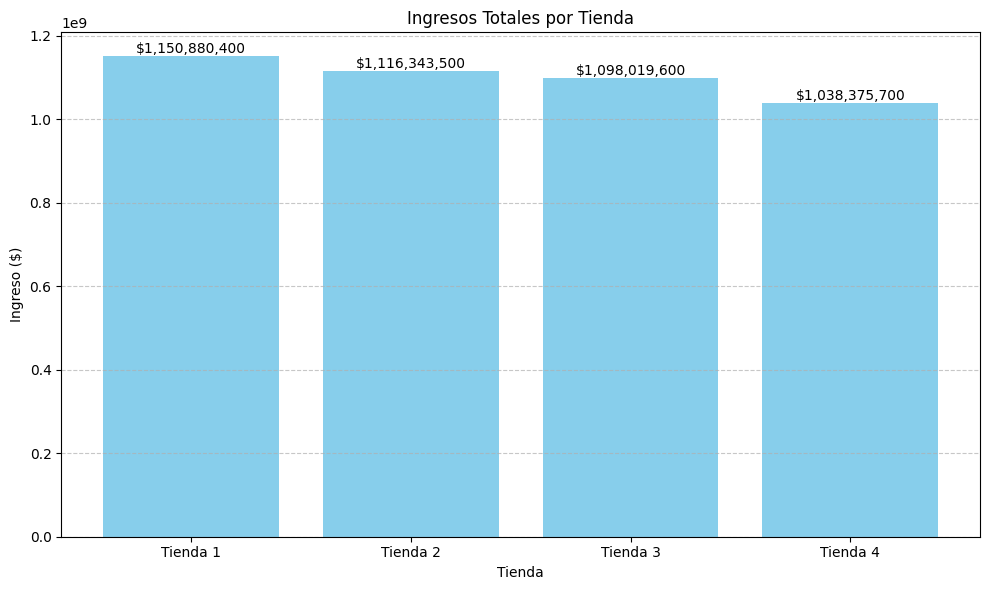

In [ ]:
import matplotlib.pyplot as plt

# Datos para el gr√°fico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gr√°fico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


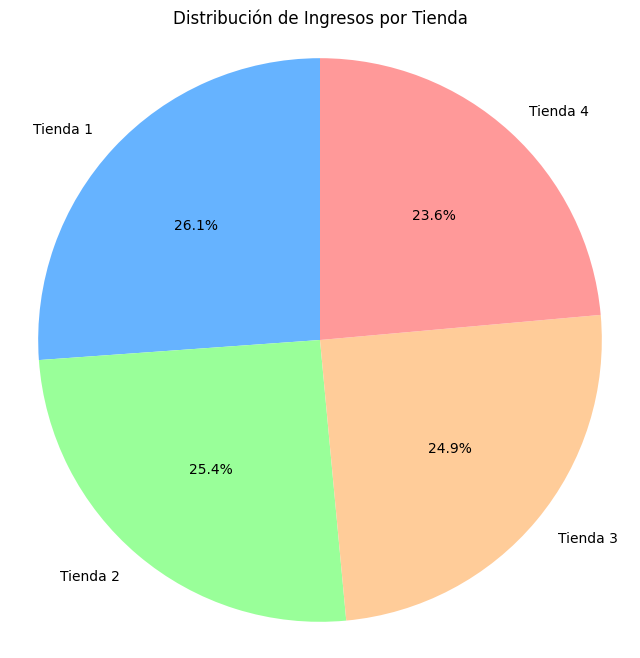

In [ ]:
# Gr√°fico de pastel para distribuci√≥n de ingresos
plt.figure(figsize=(8, 8))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Distribuci√≥n de Ingresos por Tienda')
plt.axis('equal')  # Para que el pastel sea un c√≠rculo
plt.show()


# 2. Ventas por categor√≠a

In [ ]:
# Verificar las columnas de los DataFrames
print("Columnas Tienda 1:", tienda.columns)
print("Columnas Tienda 2:", tienda2.columns)
print("Columnas Tienda 3:", tienda3.columns)
print("Columnas Tienda 4:", tienda4.columns)


Columnas Tienda 1: Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 2: Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 3: Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Columnas Tienda 4: Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtyp

In [ ]:
# Contar productos vendidos por categor√≠a en cada tienda
ventas_categoria_t1 = tienda['Categor√≠a del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categor√≠a del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categor√≠a del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categor√≠a del Producto'].value_counts()

# Mostrar los resultados
print("Ventas por Categor√≠a - Tienda 1:\n", ventas_categoria_t1, "\n")
print("Ventas por Categor√≠a - Tienda 2:\n", ventas_categoria_t2, "\n")
print("Ventas por Categor√≠a - Tienda 3:\n", ventas_categoria_t3, "\n")
print("Ventas por Categor√≠a - Tienda 4:\n", ventas_categoria_t4, "\n")


Ventas por Categor√≠a - Tienda 1:
 Categor√≠a del Producto
Muebles                    465
Electr√≥nicos               448
Juguetes                   324
Electrodom√©sticos          312
Deportes y diversi√≥n       284
Instrumentos musicales     182
Libros                     173
Art√≠culos para el hogar    171
Name: count, dtype: int64 

Ventas por Categor√≠a - Tienda 2:
 Categor√≠a del Producto
Muebles                    442
Electr√≥nicos               422
Juguetes                   313
Electrodom√©sticos          305
Deportes y diversi√≥n       275
Instrumentos musicales     224
Libros                     197
Art√≠culos para el hogar    181
Name: count, dtype: int64 

Ventas por Categor√≠a - Tienda 3:
 Categor√≠a del Producto
Muebles                    499
Electr√≥nicos               451
Juguetes                   315
Electrodom√©sticos          278
Deportes y diversi√≥n       277
Libros                     185
Instrumentos musicales     177
Art√≠culos para el hogar    177
Name: count

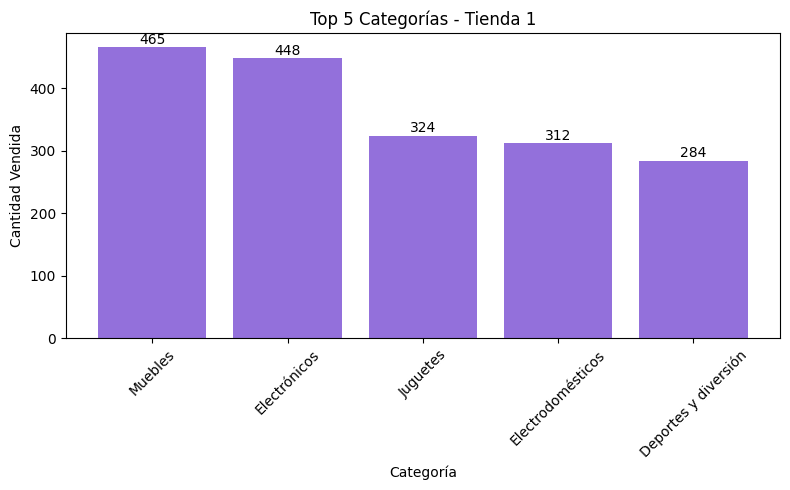

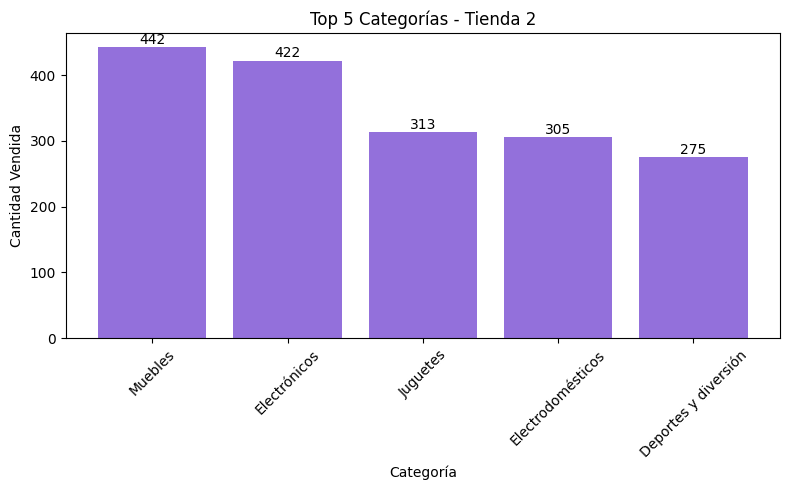

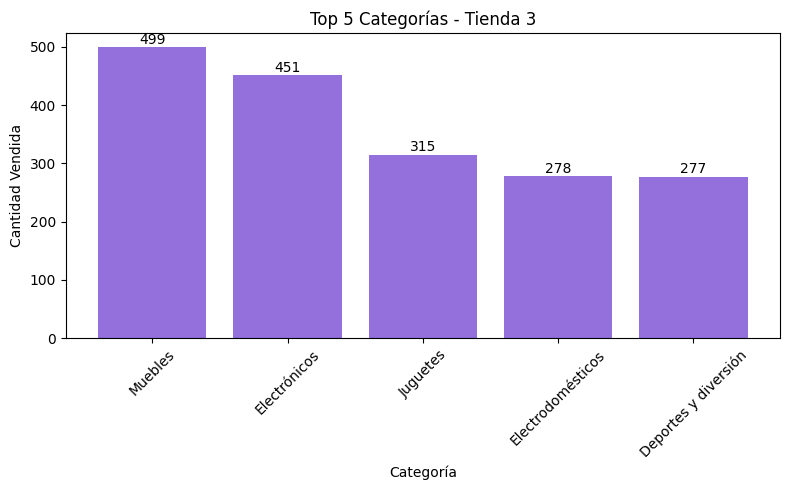

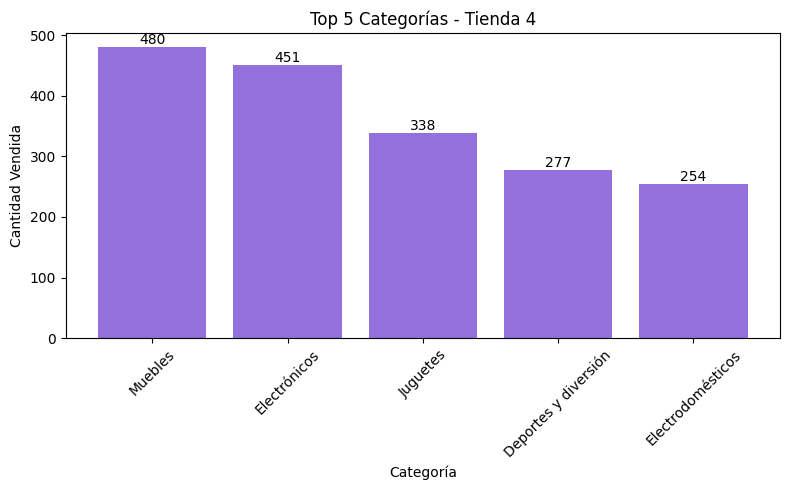

In [ ]:
# Funci√≥n para graficar el top N de categor√≠as por tienda
def graficar_top_categorias(ventas_categoria, tienda_nombre, top_n=5):
    top_categorias = ventas_categoria.head(top_n)
    plt.figure(figsize=(8,5))
    bars = plt.bar(top_categorias.index, top_categorias.values, color='mediumpurple')
    plt.title(f"Top {top_n} Categor√≠as - {tienda_nombre}")
    plt.xlabel("Categor√≠a")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_categorias(ventas_categoria_t1, "Tienda 1")
graficar_top_categorias(ventas_categoria_t2, "Tienda 2")
graficar_top_categorias(ventas_categoria_t3, "Tienda 3")
graficar_top_categorias(ventas_categoria_t4, "Tienda 4")


# 3. Calificaci√≥n promedio de la tienda


In [ ]:
# Asegurarnos de que la columna 'Calificaci√≥n' est√© en formato num√©rico
tienda['Calificaci√≥n'] = pd.to_numeric(tienda['Calificaci√≥n'], errors='coerce')
tienda2['Calificaci√≥n'] = pd.to_numeric(tienda2['Calificaci√≥n'], errors='coerce')
tienda3['Calificaci√≥n'] = pd.to_numeric(tienda3['Calificaci√≥n'], errors='coerce')
tienda4['Calificaci√≥n'] = pd.to_numeric(tienda4['Calificaci√≥n'], errors='coerce')

# Calcular calificaci√≥n promedio por tienda
calificacion_promedio_tienda1 = tienda['Calificaci√≥n'].mean()
calificacion_promedio_tienda2 = tienda2['Calificaci√≥n'].mean()
calificacion_promedio_tienda3 = tienda3['Calificaci√≥n'].mean()
calificacion_promedio_tienda4 = tienda4['Calificaci√≥n'].mean()

# Mostrar los resultados
print(f"Calificaci√≥n promedio Tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificaci√≥n promedio Tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificaci√≥n promedio Tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificaci√≥n promedio Tienda 4: {calificacion_promedio_tienda4:.2f}")


Calificaci√≥n promedio Tienda 1: 3.98
Calificaci√≥n promedio Tienda 2: 4.04
Calificaci√≥n promedio Tienda 3: 4.05
Calificaci√≥n promedio Tienda 4: 4.00


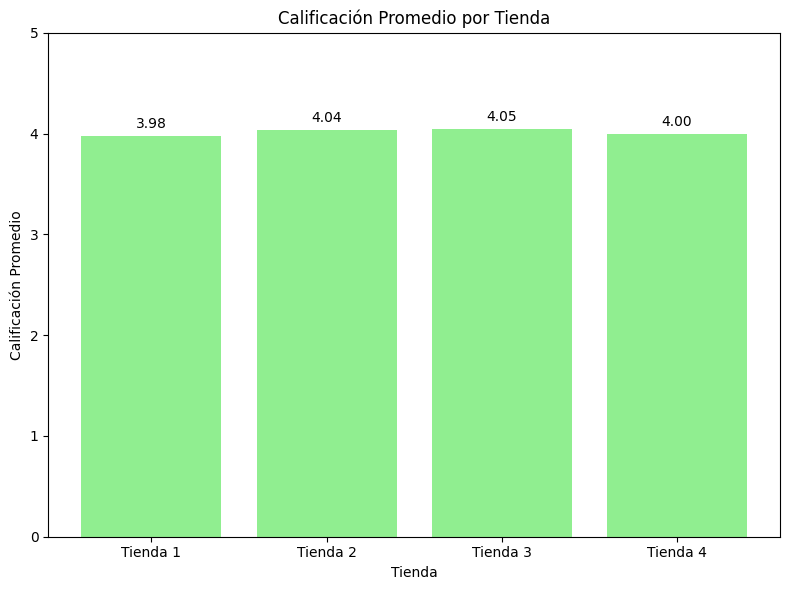

In [ ]:
# Graficar las calificaciones promedio por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [
    calificacion_promedio_tienda1,
    calificacion_promedio_tienda2,
    calificacion_promedio_tienda3,
    calificacion_promedio_tienda4
]

# Crear gr√°fico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tiendas, calificaciones_promedio, color='lightgreen')
plt.title('Calificaci√≥n Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificaci√≥n Promedio')
plt.ylim(0, 5)  # Para que la escala de las calificaciones est√© entre 0 y 5
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [ ]:
# Contar la cantidad de veces que cada producto aparece (ventas por producto)
ventas_producto_t1 = tienda['Producto'].value_counts()
ventas_producto_t2 = tienda2['Producto'].value_counts()
ventas_producto_t3 = tienda3['Producto'].value_counts()
ventas_producto_t4 = tienda4['Producto'].value_counts()

# Mostrar los resultados
print("Productos m√°s vendidos - Tienda 1:\n", ventas_producto_t1.head(), "\n")
print("Productos menos vendidos - Tienda 1:\n", ventas_producto_t1.tail(), "\n")
print("Productos m√°s vendidos - Tienda 2:\n", ventas_producto_t2.head(), "\n")
print("Productos menos vendidos - Tienda 2:\n", ventas_producto_t2.tail(), "\n")
print("Productos m√°s vendidos - Tienda 3:\n", ventas_producto_t3.head(), "\n")
print("Productos menos vendidos - Tienda 3:\n", ventas_producto_t3.tail(), "\n")
print("Productos m√°s vendidos - Tienda 4:\n", ventas_producto_t4.head(), "\n")
print("Productos menos vendidos - Tienda 4:\n", ventas_producto_t4.tail(), "\n")


Productos m√°s vendidos - Tienda 1:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64 

Productos menos vendidos - Tienda 1:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presi√≥n                35
Auriculares con micr√≥fono      33
Celular ABXY                   33
Name: count, dtype: int64 

Productos m√°s vendidos - Tienda 2:
 Producto
Iniciando en programaci√≥n    65
Microondas                   62
Bater√≠a                      61
Guitarra ac√∫stica            58
Pandereta                    58
Name: count, dtype: int64 

Productos menos vendidos - Tienda 2:
 Producto
Auriculares        37
Sill√≥n             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64 

Productos m√°s vendidos - Tienda 3:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de

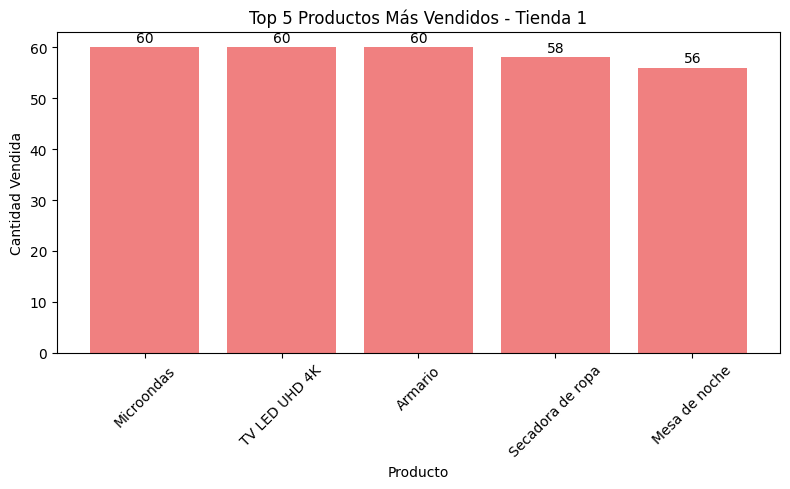

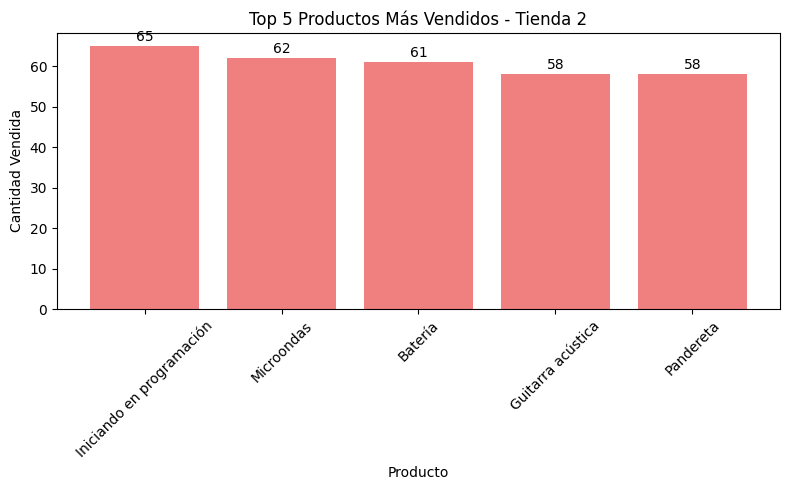

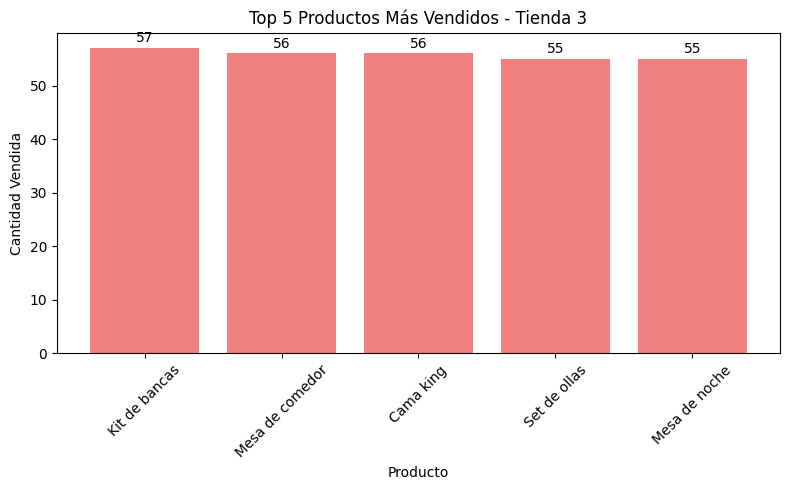

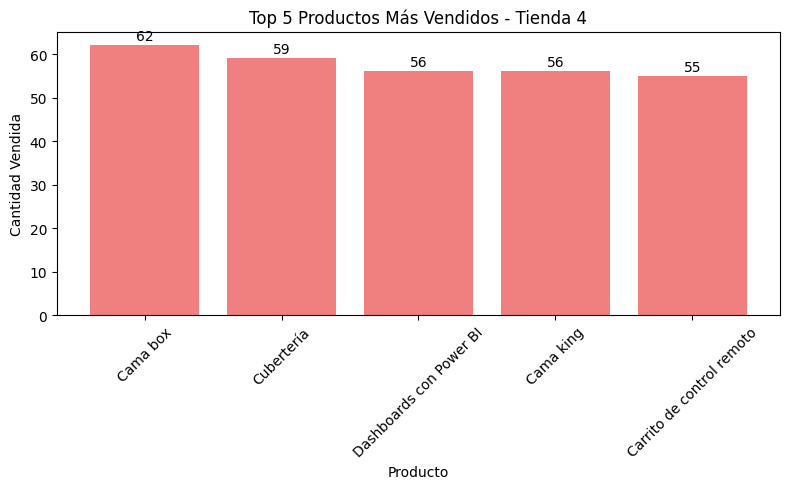

In [ ]:
# Funci√≥n para graficar los productos m√°s vendidos
def graficar_top_productos(ventas_producto, tienda_nombre, top_n=5):
    top_productos = ventas_producto.head(top_n)
    plt.figure(figsize=(8,5))
    bars = plt.bar(top_productos.index, top_productos.values, color='lightcoral')
    plt.title(f"Top {top_n} Productos M√°s Vendidos - {tienda_nombre}")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_productos(ventas_producto_t1, "Tienda 1")
graficar_top_productos(ventas_producto_t2, "Tienda 2")
graficar_top_productos(ventas_producto_t3, "Tienda 3")
graficar_top_productos(ventas_producto_t4, "Tienda 4")


# 5. Env√≠o promedio por tienda

In [ ]:
# Asegurarnos de que la columna 'Costo de env√≠o' est√© en formato num√©rico
tienda['Costo de env√≠o'] = pd.to_numeric(tienda['Costo de env√≠o'], errors='coerce')
tienda2['Costo de env√≠o'] = pd.to_numeric(tienda2['Costo de env√≠o'], errors='coerce')
tienda3['Costo de env√≠o'] = pd.to_numeric(tienda3['Costo de env√≠o'], errors='coerce')
tienda4['Costo de env√≠o'] = pd.to_numeric(tienda4['Costo de env√≠o'], errors='coerce')

# Calcular costo de env√≠o promedio por tienda
costo_envio_promedio_tienda1 = tienda['Costo de env√≠o'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de env√≠o'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de env√≠o'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de env√≠o'].mean()

# Mostrar los resultados
print(f"Costo de env√≠o promedio Tienda 1: ${costo_envio_promedio_tienda1:.2f}")
print(f"Costo de env√≠o promedio Tienda 2: ${costo_envio_promedio_tienda2:.2f}")
print(f"Costo de env√≠o promedio Tienda 3: ${costo_envio_promedio_tienda3:.2f}")
print(f"Costo de env√≠o promedio Tienda 4: ${costo_envio_promedio_tienda4:.2f}")


Costo de env√≠o promedio Tienda 1: $26018.61
Costo de env√≠o promedio Tienda 2: $25216.24
Costo de env√≠o promedio Tienda 3: $24805.68
Costo de env√≠o promedio Tienda 4: $23459.46


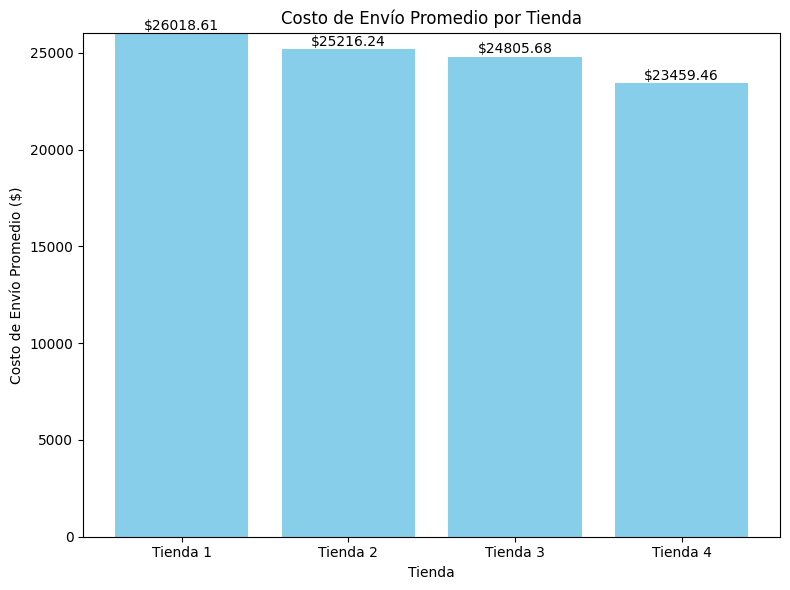

In [ ]:
# Graficar el costo de env√≠o promedio por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio_promedio = [
    costo_envio_promedio_tienda1,
    costo_envio_promedio_tienda2,
    costo_envio_promedio_tienda3,
    costo_envio_promedio_tienda4
]

# Crear gr√°fico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tiendas, costos_envio_promedio, color='skyblue')
plt.title('Costo de Env√≠o Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Env√≠o Promedio ($)')
plt.ylim(0, max(costos_envio_promedio) + 10)  # Ajustar el l√≠mite superior para una mejor visualizaci√≥n
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'${height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Analisis del Desempe√±o Geografico

Ventas por Ubicacion - Grafico de Dispersion

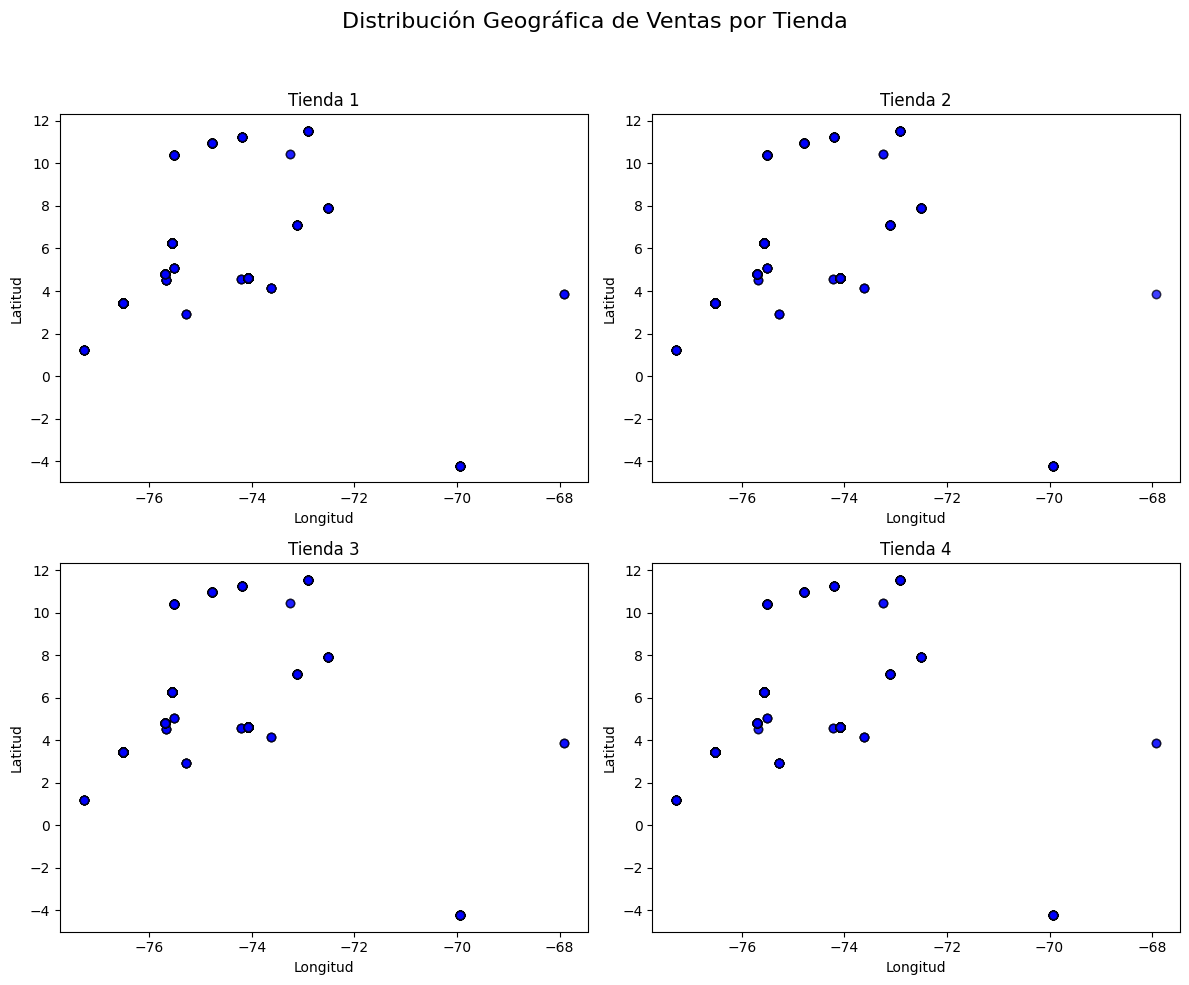

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con subplots para las 4 tiendas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribuci√≥n Geogr√°fica de Ventas por Tienda', fontsize=16)

# Lista de tiendas
tiendas = [(tienda, 'Tienda 1'), (tienda2, 'Tienda 2'), (tienda3, 'Tienda 3'), (tienda4, 'Tienda 4')]
ax_list = axs.flatten()

# Graficar cada tienda
for i, (df, titulo) in enumerate(tiendas):
    ax = ax_list[i]
    ax.scatter(df['lon'], df['lat'], alpha=0.5, c='blue', edgecolor='k')
    ax.set_title(titulo)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Mapa de Calor de Densidad - Heatmap con Seaborn

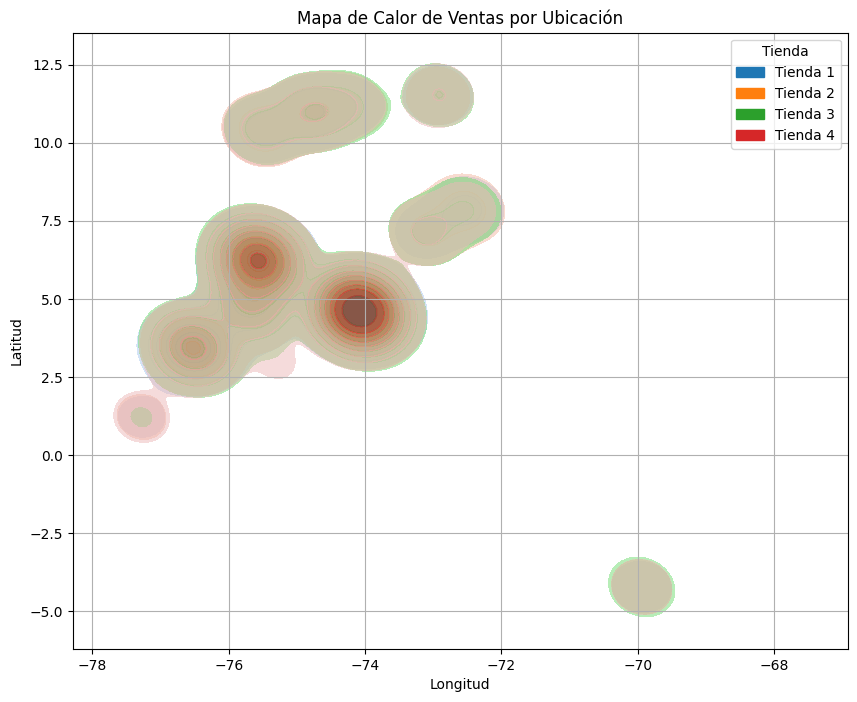

In [ ]:
import seaborn as sns

# Unir todos los datos en un solo DataFrame y agregar etiquetas
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df_all = pd.concat([tienda, tienda2, tienda3, tienda4])

plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_all, x='lon', y='lat', hue='Tienda', fill=True, alpha=0.5)
plt.title('Mapa de Calor de Ventas por Ubicaci√≥n')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


Ingresos por Regi√≥n

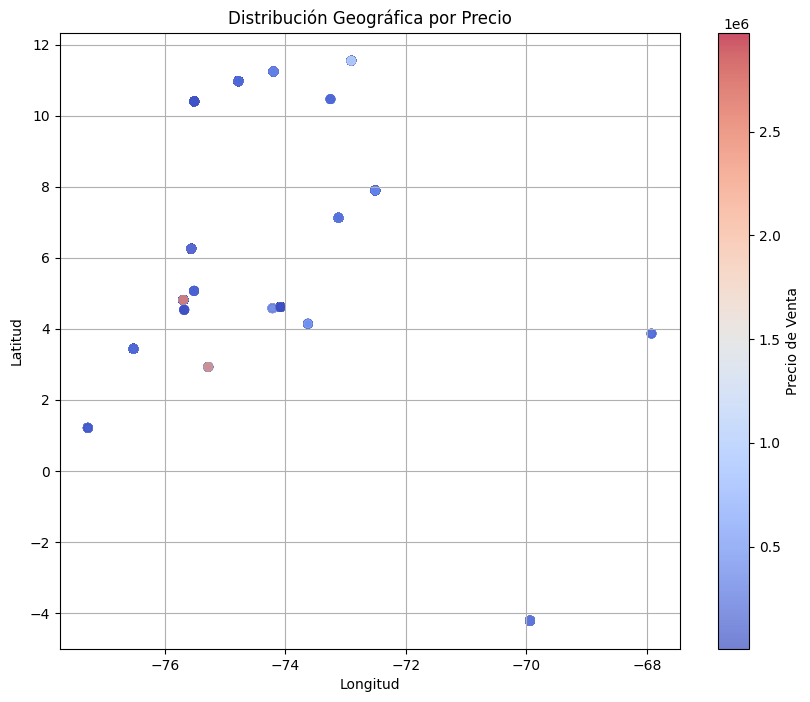

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_all['lon'], df_all['lat'], c=df_all['Precio'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Precio de Venta')
plt.title('Distribuci√≥n Geogr√°fica por Precio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


# üìä Informe Final de An√°lisis de Tiendas - Alura Store

## 1. üß≠ Introducci√≥n

El presente informe tiene como objetivo determinar **cu√°l de las cuatro tiendas del Sr. Juan debe ser vendida**, con base en un an√°lisis exhaustivo de desempe√±o. Se consideraron m√∫ltiples variables clave para la toma de decisi√≥n:

- Ingresos totales por tienda  
- Categor√≠as de productos m√°s y menos vendidos  
- Calificaciones promedio de los clientes  
- Productos m√°s y menos vendidos  
- Costo de env√≠o promedio

Este an√°lisis identifica fortalezas y debilidades de cada tienda, brindando una recomendaci√≥n clara y objetiva.

---

## 2. üìå Desarrollo

### 2.1. üí∞ Ingresos Totales por Tienda

- **Tienda 1**: $1,150,880,400.00

- **Tienda 2**: $1,116,343,500.00  

- **Tienda 3**: $1,098,019,600.00  

- **Tienda 4**: $1,038,375,700.00  



**‚û°Ô∏è Conclusi√≥n**: La Tienda 1 es la m√°s rentable. La Tienda 4 muestra el menor ingreso.

---

### 2.2. üì¶ Ventas por Categor√≠a

Todas las tiendas comparten un patr√≥n similar:

- **Categor√≠as m√°s vendidas**: Muebles y Electr√≥nicos
- **Categor√≠as menos vendidas**: Art√≠culos para el hogar, Libros e Instrumentos musicales

**‚û°Ô∏è Conclusi√≥n**: Aunque similares, la Tienda 3 lidera en cantidad total de ventas por categor√≠a.

---

### 2.3. üåü Calificaci√≥n Promedio por Tienda

| Tienda  | Calificaci√≥n Promedio |
|---------|------------------------|
| Tienda 1 | 3.98 ‚ùå              |
| Tienda 2 | 4.04                 |
| Tienda 3 | 4.05 ‚úÖ              |
| Tienda 4 | 4.00                 |

**‚û°Ô∏è Conclusi√≥n**: Tienda 3 tiene la mejor satisfacci√≥n del cliente.

---

### 2.4. üèÜ Productos M√°s y Menos Vendidos

#### M√°s vendidos:
- **Tienda 1**: Microondas, TV LED UHD 4K, Armario
- **Tienda 2**: Iniciando en programaci√≥n, Bater√≠a, Microondas
- **Tienda 3**: Kit de bancas, Mesa de comedor, Cama king
- **Tienda 4**: Cama box, Cuberter√≠a, Power BI Dashboards

#### Menos vendidos:
- Repetici√≥n de productos con baja demanda como: Guitarra el√©ctrica, Pandereta, Ciencia de datos con Python, Celular ABXY

**‚û°Ô∏è Conclusi√≥n**: Tienda 1 y 2 presentan m√°s consistencia en sus productos top. Las dem√°s presentan m√°s dispersi√≥n.

---

### 2.5. üöö Costo de Env√≠o Promedio

- **Tienda 1**: $26,018.61 ‚ùå

- **Tienda 2**: $25,216.24

- **Tienda 3**: $24,805.68

- **Tienda 4**: $23,459.46 ‚úÖ

**‚û°Ô∏è Conclusi√≥n**: Tienda 4 es la m√°s eficiente en log√≠stica. Tienda 1 la m√°s costosa.

---

## 3. ‚úÖ Conclusi√≥n y Recomendaci√≥n

Luego de evaluar los factores clave, se concluye que:

> ### üí° **El Sr. Juan deber√≠a vender la Tienda 4**

### üéØ Justificaci√≥n:
- **Menor ingreso**: $1,038,375,700.00
- **Calificaci√≥n promedio baja**: 4.00
- **Ventas por categor√≠a similares**, pero no destaca
- **Costo log√≠stico bajo**, pero no compensa los puntos anteriores

### üè™ Tiendas a conservar:
- **Tienda 1**: Mayor ingreso total y ventas consistentes
- **Tienda 2**: Buen balance entre ingreso, satisfacci√≥n y log√≠stica
- **Tienda 3**: Mejor calificaci√≥n y costos de env√≠o competitivos

---

